<a href="https://colab.research.google.com/github/karenthiran/plant_height_esimination/blob/main/plant_height_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving tomato_stagewise_10plants_varied_growth.csv to tomato_stagewise_10plants_varied_growth.csv


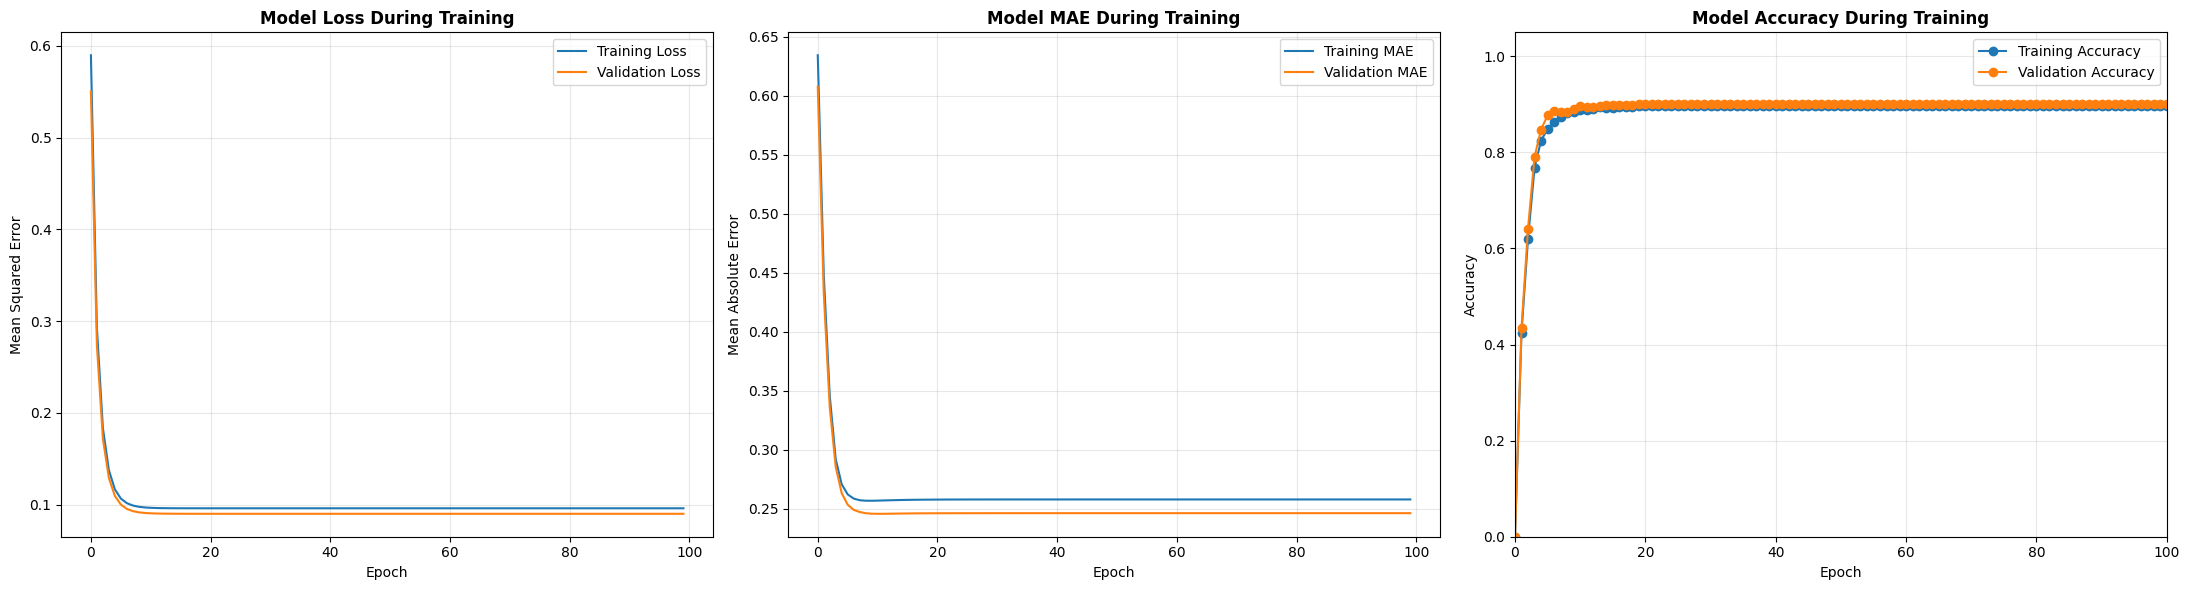

In [1]:
# ===================================================================
# Google Colab: Plant Height Model with MSE, MAE, and Accuracy
# ===================================================================
# Install dependencies
!pip install scikit-learn matplotlib pandas

# -----------------------
# 1. Import libraries
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler

# -----------------------
# 2. Load and Prepare Dataset
# -----------------------
from google.colab import files
uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename)

# --- Data Cleaning and Preparation ---
df['plant_height'] = pd.to_numeric(df['plant_height'], errors='coerce')
df = df.dropna(subset=['plant_height'])
df['time_step'] = df.groupby('Plant_ID').cumcount() + 1

# Categorize plant height for our classification target
def categorize_height(h):
    if h < 20: return 0
    elif h < 50: return 1
    else: return 2
df['height_category'] = df['plant_height'].apply(categorize_height)

# -----------------------
# 3. Prepare Data for Model
# -----------------------
X = df[['time_step']]
y = df['height_category']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# -----------------------
# 4. Iterative Model Training with All Metrics Tracked
# -----------------------
model = SGDRegressor(max_iter=1, tol=None, warm_start=True, random_state=42, eta0=0.001)

n_epochs = 100

train_mse_history = []
val_mse_history = []
train_mae_history = []
val_mae_history = []
train_acc_history = []
val_acc_history = []

for epoch in range(n_epochs):
    model.partial_fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)

    y_train_pred_round = np.clip(np.round(y_train_pred), 0, 2).astype(int)
    y_val_pred_round = np.clip(np.round(y_val_pred), 0, 2).astype(int)

    train_mse_history.append(mean_squared_error(y_train, y_train_pred))
    val_mse_history.append(mean_squared_error(y_val, y_val_pred))
    train_mae_history.append(mean_absolute_error(y_train, y_train_pred))
    val_mae_history.append(mean_absolute_error(y_val, y_val_pred))
    train_acc_history.append(accuracy_score(y_train, y_train_pred_round))
    val_acc_history.append(accuracy_score(y_val, y_val_pred_round))

# -----------------------
# 5. Plot All Training Metrics
# -----------------------
plt.figure(figsize=(22, 6))

# Subplot 1: Model Loss (MSE) - Corrected to (1, 3, 1)
plt.subplot(1, 3, 1)
plt.plot(range(n_epochs), train_mse_history, label="Training Loss")
plt.plot(range(n_epochs), val_mse_history, label="Validation Loss")
plt.title("Model Loss During Training", fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Model MAE - Corrected to (1, 3, 2)
plt.subplot(1, 3, 2)
plt.plot(range(n_epochs), train_mae_history, label="Training MAE")
plt.plot(range(n_epochs), val_mae_history, label="Validation MAE")
plt.title("Model MAE During Training", fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Model Accuracy (starting from zero) - Corrected to (1, 3, 3)
plot_train_acc = [0] + train_acc_history
plot_val_acc = [0] + val_acc_history
plot_epochs = range(n_epochs + 1)

plt.subplot(1, 3, 3)
plt.plot(plot_epochs, plot_train_acc, marker='o', linestyle='-', label="Training Accuracy")
plt.plot(plot_epochs, plot_val_acc, marker='o', linestyle='-', label="Validation Accuracy")
plt.title("Model Accuracy During Training", fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.xlim(0, n_epochs)

plt.tight_layout()
plt.show()

In [2]:
final_accuracy = val_acc_history[-1]
print(f"Final Validation Accuracy: {final_accuracy * 100:.2f}%")

Final Validation Accuracy: 90.10%
